In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import xgboost as xgb 
from geopy.distance import geodesic
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Question 1

In [2]:
#Loading dataset
try:
    df = pd.read_csv("green_tripdata_2015-09.csv")
    print("Loading Dataset Successful")
except:
    print("Loading Dataset unsuccessful. Please check if file is present in same folder as this program with file name green_tripdata_2015-09.csv")


Loading Dataset Successful


In [3]:
#Checking count of rows and columns in dataset
rows, columns = df.shape

print("Row count:",rows,"\nColumn count:",columns)

Row count: 1494926 
Column count: 21


# Question 2

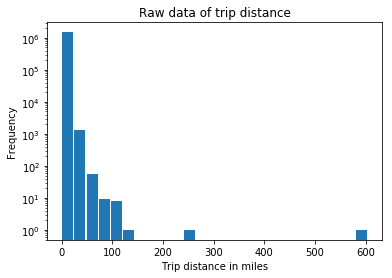

In [4]:
#Plotting histogram for trip_distance
distance = df['Trip_distance']
plt.hist(df['Trip_distance'],bins = 25,rwidth = 0.9)
plt.xlabel('Trip distance in miles')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Raw data of trip distance')
plt.show()

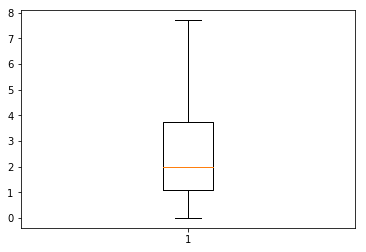

Mean is  2.9681408511189864
Median is  1.98
Standard Dev is  3.076620809361319
Max is  603.1
Min is  0.0


In [5]:
#Checking for outliers using boxplot
plt.boxplot(distance,showfliers=False)
plt.show()

#Checking some characteristics of our data
print('Mean is ',distance.mean())
print('Median is ',distance.median())
print('Standard Dev is ',distance.std())
print('Max is ',distance.max())
print('Min is ',distance.min())


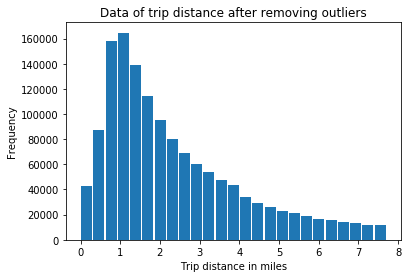

In [5]:
#Find and remove outliers using interquartile range(IQR) (1)
Q1 = distance.quantile(0.25)
Q3 = distance.quantile(0.75)
IQR = Q3 - Q1

#discard the outliers
distance = distance[~((distance < (Q1 - 1.5*IQR)) | (distance > (Q3 + 1.5*IQR)))]

#Plotting histogram (2)
plt.hist(distance,bins = 25,rwidth = 0.9)
plt.xlabel('Trip distance in miles')
plt.ylabel('Frequency')
plt.title('Data of trip distance after removing outliers')
plt.show()

# Question 3

In [6]:
#Creating another datframe to report mean and median trip distance
meandf = pd.DataFrame(columns = ['pickup_hour','mean','median'])

#Converting string to date time format
pickup_time = pd.to_datetime(df['lpep_pickup_datetime'])

#Setting up data for aggregation
meandf['pickup_hour'] = pd.DatetimeIndex(pickup_time).hour
meandf['mean'] = df['Trip_distance']
meandf['median'] = df['Trip_distance']



In [7]:
#Displaying the results
print("Mean and median trip distance grouped by hour of day\n")

print(meandf.groupby('pickup_hour',as_index=False).agg({'mean':'mean','median':'median'}))

Mean and median trip distance grouped by hour of day

    pickup_hour      mean  median
0             0  3.115276    2.20
1             1  3.017347    2.12
2             2  3.046176    2.14
3             3  3.212945    2.20
4             4  3.526555    2.36
5             5  4.133474    2.90
6             6  4.055149    2.84
7             7  3.284394    2.17
8             8  3.048450    1.98
9             9  2.999105    1.96
10           10  2.944482    1.92
11           11  2.912015    1.88
12           12  2.903065    1.89
13           13  2.878294    1.84
14           14  2.864304    1.83
15           15  2.857040    1.81
16           16  2.779852    1.80
17           17  2.679114    1.78
18           18  2.653222    1.80
19           19  2.715597    1.85
20           20  2.777052    1.90
21           21  2.999189    2.03
22           22  3.185394    2.20
23           23  3.191538    2.22


In [8]:
"""
jfk_trips = pd.DataFrame()
jfk_trips['pickup_lat'] = df.Pickup_latitude
jfk_trips['pickup_long'] = df.Pickup_longitude
jfk_trips['drop_lat'] = df.Dropoff_latitude
jfk_trips['drop_long'] = df.Dropoff_longitude
jfk_trips['jfk_lat'] = 40.6413111
jfk_trips['jfk_long'] = -73.7781391
jfk_trips
x = (jfk_trips.jfk_lat, jfk_trips.jfk_long)
y = (jfk_trips.pickup_lat, jfk_trips.pickup_long)

trip_distance = pd.DataFrame(columns = ['pickup_dist','dropoff_dist'])

for i in range(10):
    trip_distance['pickup_dist'].loc[i] = geodesic((40.684956,-73.979485),(jfk_trips['pickup_lat'][i],jfk_trips['pickup_long'][i])).miles
print(geodesic((40.684956,-73.979485),(jfk_trips['pickup_lat'][0],jfk_trips['pickup_long'][0])).miles)
"""

"\njfk_trips = pd.DataFrame()\njfk_trips['pickup_lat'] = df.Pickup_latitude\njfk_trips['pickup_long'] = df.Pickup_longitude\njfk_trips['drop_lat'] = df.Dropoff_latitude\njfk_trips['drop_long'] = df.Dropoff_longitude\njfk_trips['jfk_lat'] = 40.6413111\njfk_trips['jfk_long'] = -73.7781391\njfk_trips\nx = (jfk_trips.jfk_lat, jfk_trips.jfk_long)\ny = (jfk_trips.pickup_lat, jfk_trips.pickup_long)\n\ntrip_distance = pd.DataFrame(columns = ['pickup_dist','dropoff_dist'])\n\nfor i in range(10):\n    trip_distance['pickup_dist'].loc[i] = geodesic((40.684956,-73.979485),(jfk_trips['pickup_lat'][i],jfk_trips['pickup_long'][i])).miles\nprint(geodesic((40.684956,-73.979485),(jfk_trips['pickup_lat'][0],jfk_trips['pickup_long'][0])).miles)\n"

In [9]:
#Its time to check for trips that originate/terminate at JFK(NYC airport area)
#Used google maps to check coordinates range surrounding JFK airport area

jfk_trip = df[((df.Pickup_longitude > -73.815012) & (df.Pickup_longitude < -73.755139)
               & (df.Pickup_latitude > 40.645249) & (df.Pickup_latitude < 40.65139)) |
              ((df.Dropoff_longitude > -73.815012) & (df.Dropoff_longitude < -73.755139)
               & (df.Dropoff_latitude > 40.645249) & (df.Dropoff_latitude < 40.65139))]

print("Rough count of JFK airport trips:",jfk_trip.shape[0])
print("The Average fair of JFK trips:", jfk_trip['Fare_amount'].mean())


Rough count of JFK airport trips: 5996
The Average fair of JFK trips: 40.981759506337546


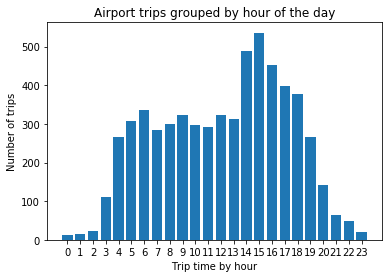

In [10]:
# Lets do some more analysis on airport data
#We will check count of airport trips grouped by hour of the day

#Creating another datframe to report pickup hour and count of pickups
countdf = pd.DataFrame(columns = ['trip_hour','trip_count'])

#Converting date time format
pickup_time = pd.to_datetime(jfk_trip['lpep_pickup_datetime'])

#Setting up data for aggregation
countdf['trip_hour'] = pd.DatetimeIndex(pickup_time).hour
countdf['trip_count'] = countdf['trip_hour']

#Performing count on trips grouped by trip hour of day
display = countdf.groupby('trip_hour',as_index=False)['trip_count'].count()

#Plotting number of trips against hour of day
plt.bar(display['trip_hour'],display['trip_count'])
plt.xlabel('Trip time by hour')
plt.ylabel('Number of trips')
plt.xticks(display['trip_hour'])
plt.title('Airport trips grouped by hour of the day')
plt.show()

Looks like ride count in the afternoon is more as compared to other hours. May be their are more flight arrival/departure around 2pm - 4pm. Read more in the documentation.

# Question 4

In [11]:
#Building a derived variable for tip as percent of total fare

df['tip_percent'] = (df['Tip_amount'] / df['Total_amount']) * 100

print("tip_percent variable derived")

tip_percent variable derived



# Starting to build the model


In [12]:
data = df.copy()# making a copy of dataset to build the model

# Data cleaning

In [13]:
data.columns #Check what columns do we have

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type ', 'tip_percent'],
      dtype='object')

In [14]:
#Check for null values in our columns
print(data.isnull().sum())

VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1494926
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      4
tip_percent                 4172
dtype: int64


In [15]:
#It lookis like 3 of our columns have null values, lets handle them one by one

#Ehail_fee column has null value for more than 90% of our data. So, lets remove the column
data.drop(['Ehail_fee'], axis=1, inplace=True)


In [16]:
#It looks like tip_percent has lots of null values because total_amount and tip_amount where 0.
#So,lets remove entries like that
#Here the data values could be imputed, but for the sake of time I am keeping it as future work
data = data[((data['Total_amount'] > 0) & (data['Tip_amount'] >= 0))]

#After observing at the nan entries for Trip_type I found out this entries have anomalies in different column.
#So, we can remove them

data = data[~(data['Trip_type '].isnull())]
print(data.isnull().sum())

VendorID                 0
lpep_pickup_datetime     0
Lpep_dropoff_datetime    0
Store_and_fwd_flag       0
RateCodeID               0
Pickup_longitude         0
Pickup_latitude          0
Dropoff_longitude        0
Dropoff_latitude         0
Passenger_count          0
Trip_distance            0
Fare_amount              0
Extra                    0
MTA_tax                  0
Tip_amount               0
Tolls_amount             0
improvement_surcharge    0
Total_amount             0
Payment_type             0
Trip_type                0
tip_percent              0
dtype: int64


In [17]:
#Now we will correct some of the data types and column names

#Lets check what do we have currently
print(data.dtypes)
print(data.columns)

VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                float64
tip_percent              float64
dtype: object
Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amoun

In [18]:
#Changing few column_names
data.rename(columns={'Trip_type ':'Trip_type','lpep_pickup_datetime':'pickup_datetime',
                     'Lpep_dropoff_datetime':'dropoff_datetime'}, inplace=True)

#Correcting data types
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

# Feature Selection(3)

In [19]:
#Lets start by splitting our features from target feature that is tip_percent

X = data.drop('tip_percent',1) #Features to be  selected
y = data['tip_percent'] #target variable


In [20]:
"""
#Using wrapper method(Backward Elimination) to select features (Failed attempt - computation inefficient)

cols = list(X.columns)

while(len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p = p.idxmax()
    if(pmax > 0.05):
        cols.remove(feature_with_p)
    else:
        break

selected_features = cols
print(selected_features)
"""

'\n#Using wrapper method(Backward Elimination) to select features (Failed attempt - computation inefficient)\n\ncols = list(X.columns)\n\nwhile(len(cols)>0):\n    p = []\n    X_1 = X[cols]\n    X_1 = sm.add_constant(X_1)\n    model = sm.OLS(y,X_1).fit()\n    p = pd.Series(model.pvalues.values[1:],index = cols)\n    pmax = max(p)\n    feature_with_p = p.idxmax()\n    if(pmax > 0.05):\n        cols.remove(feature_with_p)\n    else:\n        break\n\nselected_features = cols\nprint(selected_features)\n'

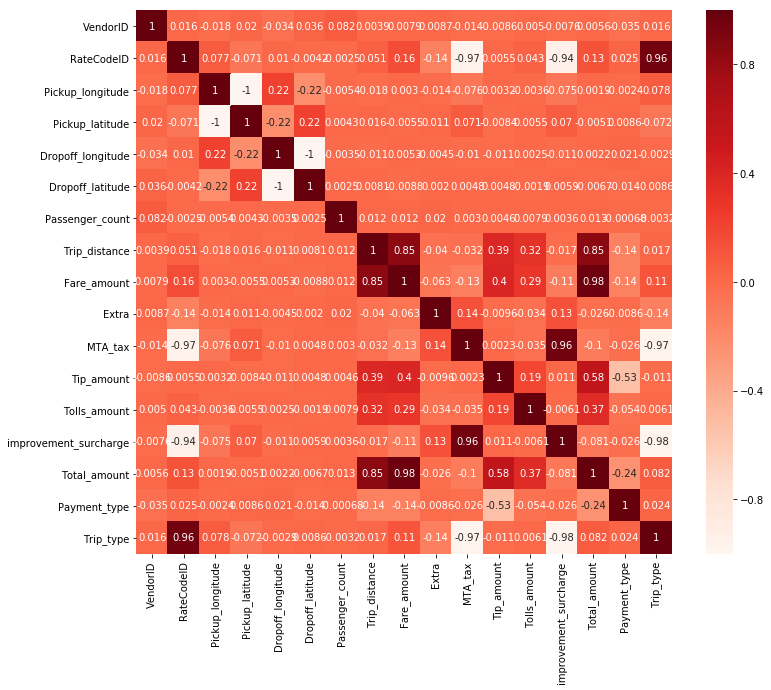

In [21]:
#Using Filter method to select features
#Reference taken from https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
plt.figure(figsize=(12,10))
cor = X.corr()
sb.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [22]:
cor_target = abs(cor['Tip_amount'])

relevent_features = cor_target[cor_target>0.4]
relevent_features

Fare_amount     0.400705
Tip_amount      1.000000
Total_amount    0.576502
Payment_type    0.527699
Name: Tip_amount, dtype: float64

In [23]:
#Preparing variables for prediction model. Removing tip amount because we will predict tip amount and we can later
#calculate tip percent based on that

if 'Tip_amount' in X:
    X = X.drop('Tip_amount',1) #Features to be  selected
y = data['Tip_amount'] #target variable

#Converting and Dropping few variables as not supported by xgb
X['pickup_hour'] = pd.DatetimeIndex(X['pickup_datetime']).hour
X['dropoff_hour'] = pd.DatetimeIndex(X['dropoff_datetime']).hour

X.Store_and_fwd_flag.replace(('Y','N'),(1,0), inplace=True)

X = X.drop('pickup_datetime',1)
X = X.drop('dropoff_datetime',1)
X = X.drop('Store_and_fwd_flag',1)


# Building Model (XGBoost) (4,5,6,7,8)

In [24]:
#Splitting train and test dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [30]:
#This code of xgboost works completely fine and it is commented because it was causing memory issue
#for running two models back to back.To check the results for this model I would recommend you to comment
#code for random forest and then run the program
"""
#Preparing hyper-parameters for our xgb regressor

xg_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree = 0.5, learning_rate = 0.1,
                         max_depth = 8, alpha = 10, n_estimators= 10, metrics="rmse")

print("Model running.......")

#Fitting the model for training set
xg_reg.fit(X_train,y_train)

#Predicting the values
outcome = xg_reg.predict(X_test)

print("Done running")
"""

Model running.......
Done running


In [31]:
"""
from sklearn.metrics import mean_squared_error
from math import sqrt

#Calculating root mean squared error
rmse = sqrt(mean_squared_error(y_test,outcome))

print("RMSE is %f" %(rmse))
"""

RMSE is 1.584375


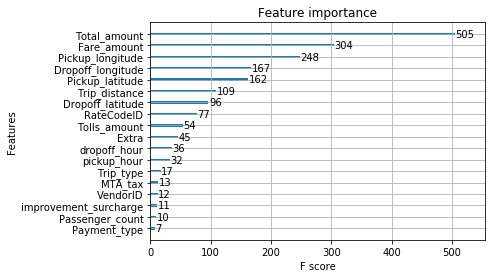

In [32]:
"""
#Lets visualize our boosting tree
xgb.plot_importance(xg_reg)
plt.show()
"""

# XGBoost with k-fold Cross Validation

In [156]:
"""
#Setting up parameters (Failed attempt)

params = {'objective' : 'reg:linear', 'colsample_bytree' : 0.5, 'learning_rate' : 0.1,
          'max_depth' : 5, 'alpha' : 10}

Running Cross-validation
crossValidation = xgb.cv(dtrain=data_matrix, params=params, nfold=100, num_boost_round=10000,
                        early_stopping_rounds=1000, metrics="rmse", as_pandas=True, seed=2000)
"""

# SGD Regressor Model

In [157]:
"""
from sklearn.linear_model import SGDRegressor

#Creating Stochastic Gradiant Descent regressor
fitter = SGDRegressor(loss="squared_loss", penalty=None)

#Converting data frames to matrix

X_train1 = X_train.as_matrix()
X_test1 = X_test.as_matrix()
y_train1 = y_train.tolist()
y_test1 = y_test.tolist()

#Fitting regression model
fitter.fit(X_train1,y_train1)
"""

'\nfrom sklearn.linear_model import SGDRegressor\n\n#Creating Stochastic Gradiant Descent regressor\nfitter = SGDRegressor(loss="squared_loss", penalty=None)\n\n#Converting data frames to matrix\n\nX_train1 = X_train.as_matrix()\nX_test1 = X_test.as_matrix()\ny_train1 = y_train.tolist()\ny_test1 = y_test.tolist()\n\n#Fitting regression model\nfitter.fit(X_train1,y_train1)\n'

# Random Forest Model

In [25]:
from sklearn.ensemble import RandomForestRegressor

#Setting up Random Forest regressor with parameters
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

#Splitting train and test dataset
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=123)

#Converting data frames to matrix
X_train1 = train_x.as_matrix()
X_test1 = test_x.as_matrix()
y_train1 = train_y.tolist()
y_test1 = test_y.tolist()

print("Model running..........")
#Fitting regression model
rf.fit(X_train1,y_train1)
print("Done running")


Model running..........
Done running


In [26]:
#Predicting the values
output = rf.predict(X_test1)

from sklearn.metrics import mean_squared_error
from math import sqrt

#Calculating root mean squared error
rmse = sqrt(mean_squared_error(y_test1,output))

print("RMSE is %f" %(rmse))


#Here we have successfully predicted tip_amount using given features. 
#Now we can just derive the attribute tip_percent as we did before

RMSE is 0.483279


# Question 5 (Option A:Distributions)

# Data cleaning and deriving new variable

In [27]:
#Lets first get rid of unwanted variables for this experiment

#Creating new data frame 
dataS = pd.DataFrame()

#Store required variables
dataS['Trip_distance'] = df['Trip_distance']
dataS['pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
dataS['dropoff_datetime'] = pd.to_datetime(df['Lpep_dropoff_datetime'])
dataS['trip_time'] = dataS['dropoff_datetime'] - dataS['pickup_datetime']
dataS['trip_time'] = dataS['trip_time'].astype('timedelta64[s]')#in seconds

In [28]:
#Now deriving new variable
dataS['trip_avg_speed'] = dataS['Trip_distance'] / (dataS['trip_time']/3600)

In [29]:
#Earlier we found out based on trip_distance that there are outliers in our dataset. Lets remove them

print('Before removing outliers',dataS.shape) #initial row count

#discard the outliers
dataS = dataS[~((dataS['Trip_distance'] < (Q1 - 1.5*IQR)) | (dataS['Trip_distance'] > (Q3 + 1.5*IQR)))]

print('After removing outliers',dataS.shape) #row count after removing outliers

Before removing outliers (1494926, 5)
After removing outliers (1391669, 5)


In [30]:
#While going through some samples of our data set I found out there are some samples(19655) with 
#trip_distance as 0 which is causing trip_speed to be zero. We can remove them too

print('Before cleaning',dataS.shape)

dataS = dataS[~((dataS['Trip_distance'] == 0) & (dataS['trip_avg_speed'] == 0))]

print('After cleaning',dataS.shape)

Before cleaning (1391669, 5)
After cleaning (1372014, 5)


In [31]:
#While plotting histogram I came around some weird values in our dataset. So lets clean them

# removing data with average trip speed less than 1 mp/h and greater than 70
dataS = dataS[~((dataS['trip_avg_speed']<1) | (dataS['trip_avg_speed']>70))]

dataS['trip_avg_speed'] = dataS['trip_avg_speed'].replace([np.inf, -np.inf],np.nan)# converting inf to nan
dataS = dataS[~(dataS['trip_avg_speed'].isnull())] # removing null data


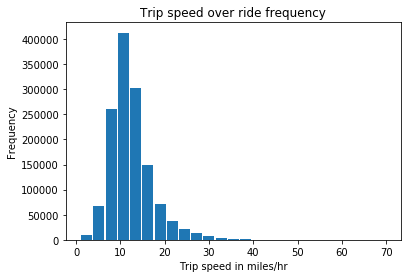

In [32]:
#Plotting histogram
plt.hist(dataS['trip_avg_speed'],bins = 25,rwidth = 0.9)
plt.xlabel('Trip speed in miles/hr')
plt.ylabel('Frequency')
plt.title('Trip speed over ride frequency')
plt.show()

# Performing hypothesis test (9,10,11,12)

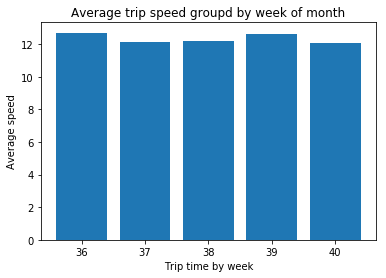

In [33]:
#Lets visualize average trip speeds in all weeks of september to get some idea

#Adding week column
dataS['week'] = pd.DatetimeIndex(dataS['pickup_datetime']).week

speeddf = pd.DataFrame()

#Setting up data for aggregation
speeddf['trip_week'] = dataS['week']
speeddf['trip_speed'] = dataS['trip_avg_speed']

#Performing speed on trips grouped by trip week
display = speeddf.groupby('trip_week',as_index=False)['trip_speed'].mean()

#Plotting 
plt.bar(display['trip_week'],display['trip_speed'])
plt.xlabel('Trip time by week')
plt.ylabel('Average speed')
#plt.xticks(display['trip_week'])
plt.title('Average trip speed groupd by week of month')
plt.show()


Null hypothesis: Week is not related to average speed that is speed are materially same

Alternate hypothesis: Week has some relation with average speed that is speed are different

In [34]:
#It can be seen in above bar chart that average speed in some weeks look similar and some differ

#Lets try to create a hypothesis to explain the above result

#Preparing weekly data for testing hypothesis
week1 = dataS[dataS["week"]==36].trip_avg_speed
week2 = dataS[dataS["week"]==37].trip_avg_speed
week3 = dataS[dataS["week"]==38].trip_avg_speed
week4 = dataS[dataS["week"]==39].trip_avg_speed
week5 = dataS[dataS["week"]==40].trip_avg_speed

In [35]:
#I will use anova test to compute p value

from scipy.stats import f_oneway

stat, p = f_oneway(week1,week2,week3,week4,week5)
print('Statistics: %.3f, p: %.3f' %(stat,p))

Statistics: 936.878, p: 0.000


As we can see that the p value is 0 indicating that we can reject our null hypothesis that week is not
related to  average speed and speed are same. We choose our alternate hypothesis that is average speed are
different and have some relation with week of the month

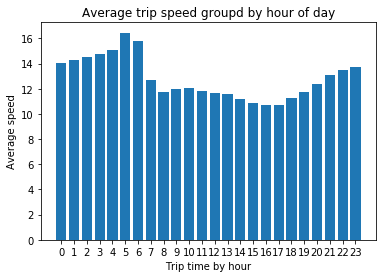

In [36]:
#Similarly we can build the hypothesis for average trip_speed as a function of time of day

#Adding week column
dataS['hour'] = pd.DatetimeIndex(dataS['pickup_datetime']).hour

speeddf = pd.DataFrame()

#Setting up data for aggregation
speeddf['trip_hour'] = dataS['hour']
speeddf['trip_speed'] = dataS['trip_avg_speed']

#Performing speed on trips grouped by trip hour
display = speeddf.groupby('trip_hour',as_index=False)['trip_speed'].mean()

#Plotting 
plt.bar(display['trip_hour'],display['trip_speed'])
plt.xlabel('Trip time by hour')
plt.ylabel('Average speed')
plt.xticks(display['trip_hour'])
plt.title('Average trip speed groupd by hour of day')
plt.show()

It can be seen in above bar chart that average speed in some hours of day is higher than others

Lets try to create a hypothesis to explain the above result

Null hypothesis: Hour is not related to average speed that speed is same

Alternate hypothesis: Hour has some relation with average speed that is speeds are different based on hour


We can reject our null hypothesis by observing the bar chart above. it is clearly seen that average speeds in
morning time 4am to 6am is high as compared to other hours.
So to prove alternate hypothesis based on average speeds, we can say that during the early morning hours when
traffic is minimal, the average speeds are high. Therefore, we can say average speed depends on hour of the day

# The End